In [1]:
import importlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
plt.style.use('dark_background')

In [2]:
colors = ["#59ffc5", "#ffed4f", "#19ffaf", "#00eaff", "#ffed4f", "#f67dff", "#ff59db", "#ff59db", "#fffba6", "cyan"]

In [3]:
import neona
importlib.reload(neona)

<module 'neona' from 'C:\\Users\\GIGABYTE\\Desktop\\3 Month Course\\PRACTICE\\Neona-project\\neona.py'>

# 

# BAR

In [5]:
def plot_configure(spines_yn= True, figsize= None):
    fig, ax = plt.subplots(figsize= figsize)
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(spines_yn)
    return fig, ax

In [6]:
def get_point(fig, point_size):
    fig_width_x_height = fig.get_figwidth() * fig.get_figheight()
    
    point_size *= 1_000
    patch_size = (point_size * fig_width_x_height) // 150
    decrease = (500 * patch_size) // 10_000
    point = (50 * patch_size) // 10_000

    size = np.arange(patch_size, 0, -decrease); gap = len(size)
    alpha = np.linspace(.05, .5, gap) ** 3
    return size, alpha, point

In [7]:
def get_lw():
    a= np.arange(15, -1, -4); gap = len(a)
    b= np.arange(0, 1, (1/gap)-.1)
    return a, b

In [8]:
def barplot(x, y, spines= True, figsize= None, point_size= 2, color= "#59ffc5", point_marker= 'o', font_dict= dict(), font_offset_xy= (0, 0), show_values= True):
    fig, ax = plot_configure(spines_yn= spines, figsize= figsize)
    sizes, alphas, point = get_point(fig, point_size)
    a, b = get_lw()
    
    for xi, yi in zip(x, y):
        for width, alpha in zip(a, b):
            ax.plot([xi, xi], [0, yi], lw= width, alpha= alpha, color= color)
        ax.plot([xi, xi], [0, yi], lw= 1, alpha= 1, color= color)
        
        for size, alpha in zip(sizes, alphas):
            ax.scatter(xi, yi, s= size, alpha= alpha, color= color, marker= point_marker)
        ax.scatter(xi, yi, s= point, alpha= 1, color= color, marker= point_marker)
        
    if show_values:
        x = plt.xticks()[0]
        for xi, yi in zip(x, y):
            ox, oy = font_offset_xy
            ax.text(xi + ox, yi + oy, str(yi), **font_dict)
            
    return ax

# 

# LINE

In [19]:
df = pd.DataFrame(np.random.randint(0, 100, (20,2)), index= pd.date_range('25/4/2021', periods= 20))

In [20]:
df.head()

,0,1
2021-04-25,41,22
2021-04-26,57,87
2021-04-27,44,44
2021-04-28,5,94
2021-04-29,23,58


In [112]:
def lineplot(x, y= None, spines= True, figsize= None, point_size= 2,
             color= "#59ffc5", point_marker= 'o', font_dict= dict(),
             font_offset_xy= (0, 0), show_values= True, show_marks= True):
    
    fig, ax = plot_configure(spines_yn= spines, figsize= figsize)
    sizes, alphas, point = get_point(fig, point_size= point_size)
    font_dict['color'] = color
    a, b = get_lw()
    
            
    # WHOLE DF / Series
    if not isinstance(y, (pd.Series, pd.DataFrame)) and y == None:
        
        # DF given
        if isinstance(x, pd.DataFrame):
            columns = [*x.columns]
            for colorId, col in enumerate(columns):
                font_dict['color'] = colors[colorId]
                
                for width, alpha in zip(a, b):
                    plt.plot(x[col], lw= width, alpha= alpha, color= colors[colorId])
                plt.plot(x[col], lw= 1, alpha= 1, color= colors[colorId])
                
                if show_values: 
                    for ind, val in zip(x[col].index, x[col].values):
                        plt.text(ind, val, str(val), **font_dict)    
                        
                if show_marks:
                    for ind, val in zip(x[col].index, x[col].values):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= colors[colorId], marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= colors[colorId], marker= point_marker)
                    
        # SERIES given / List
        else:
            for width, alpha in zip(a, b):
                plt.plot(x, lw= width, alpha= alpha, color= color)
            plt.plot(x, lw= 1, alpha= 1, color= color)
            
            if show_values:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        plt.text(ind, val, str(val), **font_dict)    
            
            if show_marks:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= color, marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= color, marker= point_marker)
    
    # Both X and Y given              
    else:
        for width, alpha in zip(a, b):
            plt.plot(x, y, lw= width, alpha= alpha, color= color)
        plt.plot(x, y, lw= 1, alpha= 1, color= color)
        
        if show_values:
            for valx, valy in zip(x, y):
                plt.text(valx, valy, str(valy), **font_dict)   
            
        if show_marks:
            for ind, val in zip(x, y):
                for size, alpha in zip(sizes, alphas):
                    plt.scatter(ind, val, s= size, alpha= alpha, color= color, marker= point_marker)
                plt.scatter(ind, val, s= 10, alpha= 1, color= color, marker= point_marker)
    
    return ax

<AxesSubplot:>

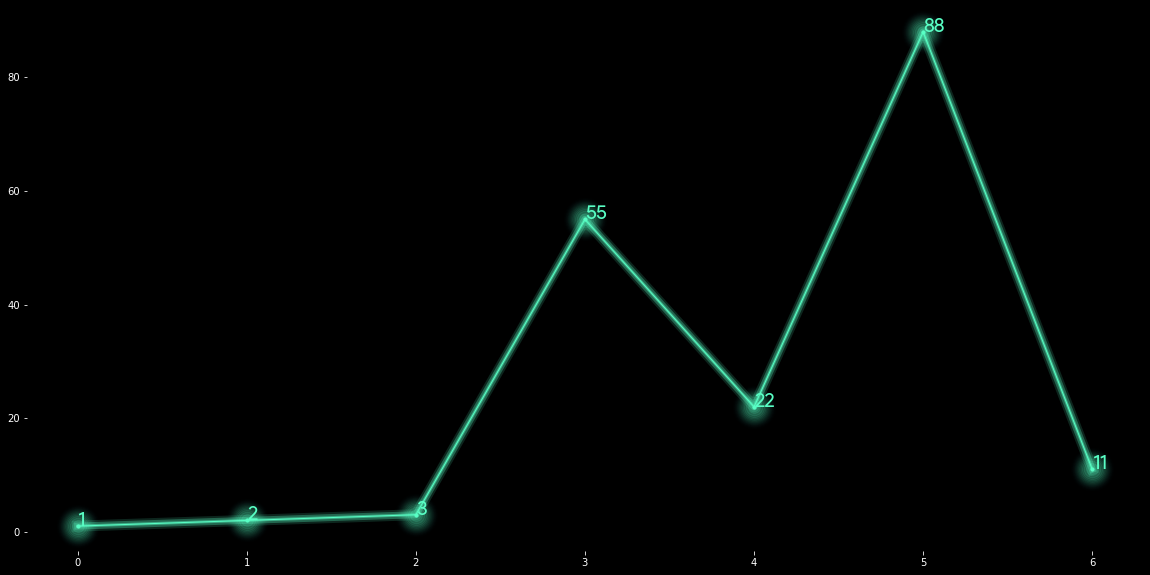

In [113]:
lineplot([1,2,3, 55, 22, 88, 11], figsize= (20, 10), point_marker= 'o', point_size= 2, spines= False,
        font_dict= dict(fontfamily= "product sans", fontsize= 20), show_marks= True, show_values= True)

# 